In [28]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
data_frame=pd.read_csv('confirmed_data.csv')

In [32]:
data_frame

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,01-Oct-21,2021-10-01,Confirmed,23918,0,809,54,303,3,2,...,27,4,31,1597,220,21,35,13,708,0
567,02-Oct-21,2021-10-02,Confirmed,23189,1,865,13,246,4,3,...,36,6,25,1578,201,15,0,5,761,0
568,03-Oct-21,2021-10-03,Confirmed,21644,1,765,32,193,3,2,...,24,1,18,1531,162,9,22,12,701,0
569,04-Oct-21,2021-10-04,Confirmed,17101,1,429,27,333,3,6,...,17,4,12,1467,207,6,16,17,601,0


In [33]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_model(p,d,q,cols):
    #splitting the total cases data.
    train_data=data_frame[cols].loc[0:450]
    test_data=data_frame[cols].loc[451:567]
#initializing the model to train
    model=ARIMA(data_frame[cols],order=(p,d,q));
#training the data and assigned to model_fit var.
    model_fit=model.fit()
    data=data_frame.copy()
#predicting using test data
    data['Forecasted_data']=model_fit.predict(start=451,end=567)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))
    return model_fit

In [34]:
# Final parameters and models for Total cases in India and in AP.
print('For TT feature')
india_model=ARIMA_model(40,0,13,'TT')
print('For AP feature')
ap_model=ARIMA_model(50,0,66,'AP')

For TT feature
p: 40, d: 0, q:13
Accuracy: 92.88%
For AP feature
p: 50, d: 0, q:66
Accuracy: 89.48%


In [35]:
data=data_frame.copy()
#data['Overall_forecasted_cases']=india_model.predict(start=451,end=567)
#data['ap_forecasted_cases']=ap_model.predict(start=451,end=567)

In [37]:
future_dates=range(568,701)

In [38]:
future_data=pd.DataFrame(index=future_dates,columns=data.columns)

In [39]:
final_data=pd.concat([data,future_data])

In [40]:
final_data['final_tt_data_forecast']=india_model.predict(start=data_frame.index[-1]+1,end=701+1,dynamic=True)
final_data['final_ap_data_forecast']=ap_model.predict(start=data_frame.index[-1]+1,end=701+1,dynamic=True)
final_data['Date_YMD'].iloc[data_frame.index[-1]+1:]=pd.date_range(start='2021-10-03',periods=133,freq='D')
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])

## Final forecast of daily cases of overall India.

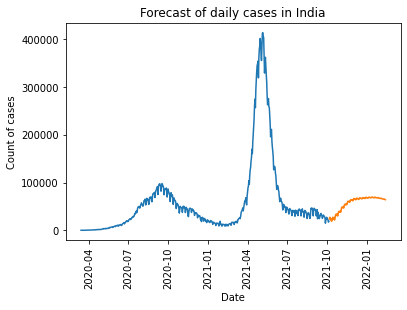

In [41]:
plt.title('Forecast of daily cases in India')
plt.plot(final_data['Date_YMD'],final_data[['TT','final_tt_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');

## Final forecast of daily cases in AP.

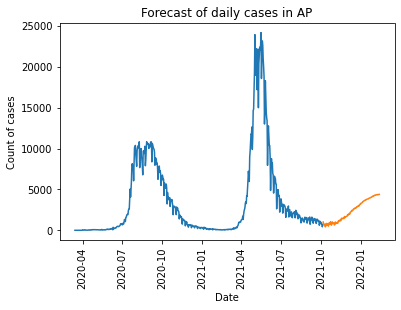

In [42]:
#final_total_forecast_data=pd.concat([final_data['AP'].dropna(),final_data['final_ap_data_forecast'].dropna()])
plt.title('Forecast of daily cases in AP')
plt.plot(final_data['Date_YMD'],final_data[['AP','final_ap_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');